In [1]:
# import library
import numpy as np

In [2]:
# features are 1 through 123 (123 only in test set), +1 for the bias
NUM_FEATURES = 124
# data path
DATA_PATH = 'adult/'

In [3]:
# returns the label and feature value vector for one datapoint (represented as a line (string) from the data file)
def parse_line(line):
    tokens = line.split()
    x = np.zeros(NUM_FEATURES)
    y = int(tokens[0])
    for t in tokens[1:]:
        parts = t.split(':')
        feature = int(parts[0])
        value = int(parts[1])
        x[feature-1] = value
    # bias
    x[-1] = 1 
    return y, x

In [4]:
# return labels and feature vectors for all datapoints in the given file
def parse_data(filename):
    with open(filename, 'r') as f:
        vals = [parse_line(line) for line in f]
        (ys, xs) = ([v[0] for v in vals],[v[1] for v in vals])
        
        # returns a tuple, first is an array of labels, second is an array of feature vectors
        return np.asarray(ys), np.asarray(xs) 

In [5]:
def perceptron(train_ys, train_xs, dev_ys, dev_xs, args):
    # Initialize weight vector to be all zeros
    weights = np.zeros(NUM_FEATURES)
    
    # TODO: implement perceptron algorithm here, respecting args
    
    # If we use dev set
    if dev_xs is not None:
        # Initialize best_weights to record the best weights so far based on the test on dev set
        best_weights = weights
    
    # Track the number of iterations
    num_iter = 0
    # While the number of iteractions does not go beyond the maximum
    while num_iter < 100:
        # # Make a deep copy of weight vector before next iteration
        # old_weights = np.array([w for w in weights])
        # Loop through each pair of (x,y) in the training dataset
        for x,y in zip(train_xs,train_ys):
            # Classify current data point based on current weights
            y_hat = np.sign(np.dot(np.transpose(weights),x))
            # If we classify incorrectly
            if y_hat!=y:
                # Update the weight vector
                weights = np.add(weights,np.array(1*y*x))
        
        # If the dev set has been used
        if dev_xs is not None:
            # Compare the performance between the current weight vector and the best weight vector so far
            if test_accuracy(best_weights, dev_ys, dev_xs) < test_accuracy(weights, dev_ys, dev_xs):
                # Make a deep copy of the current weight vector and set it as the best one
                best_weights = np.array([w for w in weights])
        
        # Increment the number of iteraction
        num_iter += 1
        # Print the progress
        if 100 <= 10: #
            print('# of iterations: {}'.format(num_iter))
        else:
            if num_iter % round(100/10) == 0:
                print('# of iterations: {}'.format(num_iter))
    
    # If the dev set is not used
    if dev_xs is None:
        # Return the current weight vector (result from the last iteration)
        return weights
    # If the dev set is used
    else:
        # Return the best weight vector among all iteration results
        return best_weights

In [6]:
def test_accuracy(weights, test_ys, test_xs):
    accuracy = 0.0

    # TODO: implement accuracy computation of given weight vector on the test data (i.e. how many test data points are classified correctly by the weight vector)

    # Predict the value of y for test dataset based on given weight vector
    test_yhat = [np.sign(np.dot(weights,x)) for x in test_xs]
    # Compute the classification accuracy in the test set
    accuracy = sum(test_yhat == test_ys)/len(test_ys)
    # Round the accuracy to 8 decimals
    accuracy = round(accuracy,8)
    
    return accuracy

In [7]:
train_y,train_x = parse_data('adult/a7a.train')
test_y,test_x = parse_data('adult/a7a.test')
dev_y,dev_x = parse_data('adult/a7a.dev')

In [33]:
w = perceptron(train_y,train_x,None,None,None)

# of iterations: 10
# of iterations: 20
# of iterations: 30
# of iterations: 40
# of iterations: 50
# of iterations: 60
# of iterations: 70
# of iterations: 80
# of iterations: 90
# of iterations: 100


In [34]:
test_accuracy(w,test_y,test_x)

0.77898594

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def model_performance(learning_rate,train_xs,train_ys,dev_xs,dev_ys):

    # Initialize weight vector to be all zeros
    weights = np.zeros(NUM_FEATURES)
    # Initialize a dataframe to record model performance on train and dev dataset for each iteration
    df = pd.DataFrame(columns=['iter_num','train_accuracy','dev_accuracy'], dtype=float)
    
    # Track the number of iterations
    num_iter = 0
    # Record the current number of iteration and model performance
    df.loc[num_iter,'iter_num'] = num_iter
    df.loc[num_iter,'train_accuracy'] = test_accuracy(weights, train_ys, train_xs)
    df.loc[num_iter,'dev_accuracy'] = test_accuracy(weights, dev_ys, dev_xs)
    # While the number of iteractions does not go beyond the maximum
    while num_iter < 100:
        # # Make a deep copy of weight vector before next iteration
        # old_weights = np.array([w for w in weights])
        # Loop through each pair of (x,y) in the training dataset
        for x,y in zip(train_xs,train_ys):
            # Classify current data point based on current weights
            y_hat = np.sign(np.dot(np.transpose(weights),x))
            # If we classify incorrectly
            if y_hat!=y:
                # Update the weight vector
                weights = np.add(weights,np.array(learning_rate*y*x))
        
        # Record the current number of iteration and model performance
        df.loc[num_iter,'iter_num'] = num_iter
        df.loc[num_iter,'train_accuracy'] = test_accuracy(weights, train_ys, train_xs)
        df.loc[num_iter,'dev_accuracy'] = test_accuracy(weights, dev_ys, dev_xs)
        
        # Increment the number of iteraction
        num_iter += 1
        # Print the progress
        if 100 <= 10: #
            print('# of iterations: {}'.format(num_iter))
        else:
            if num_iter % round(100/10) == 0:
                print('# of iterations: {}'.format(num_iter))
    
    return df

In [26]:
# Record the model performance (learning rate = 1)
performance_df_1 = model_performance(1,train_x,train_y,dev_x,dev_y)

# of iterations: 10
# of iterations: 20
# of iterations: 30
# of iterations: 40
# of iterations: 50
# of iterations: 60
# of iterations: 70
# of iterations: 80
# of iterations: 90
# of iterations: 100


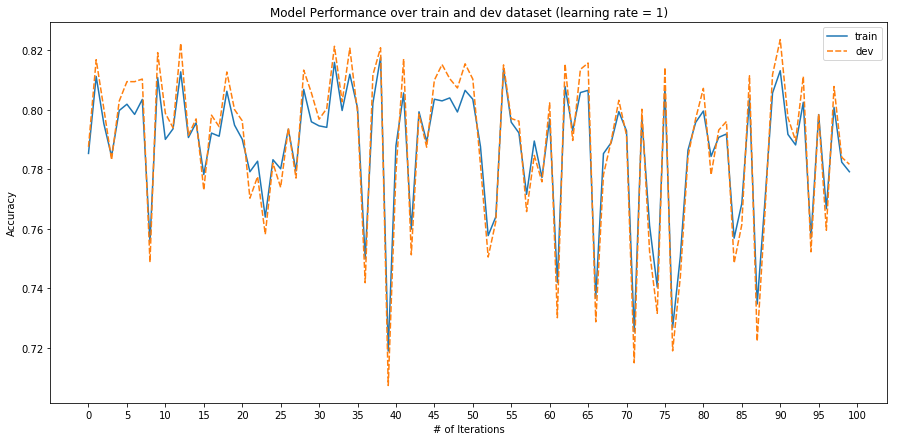

In [27]:
# Plot the model performance (learning rate = 1)
fig, ax = plt.subplots(figsize = (15,7))
sns.lineplot(data = [performance_df_1.loc[:,'train_accuracy'],
                     performance_df_1.loc[:,'dev_accuracy']])
ax.set_title('Model Performance over train and dev dataset (learning rate = 1)'); 
ax.set_xlabel('# of Iterations');
ax.set_ylabel('Accuracy');
ax.set_xticks(range(0,101,5));
ax.legend(['train','dev'])

In [28]:
# Record the model performance (learning rate = 0.01)
performance_df_001 = model_performance(0.01,train_x,train_y,dev_x,dev_y)

# of iterations: 10
# of iterations: 20
# of iterations: 30
# of iterations: 40
# of iterations: 50
# of iterations: 60
# of iterations: 70
# of iterations: 80
# of iterations: 90
# of iterations: 100


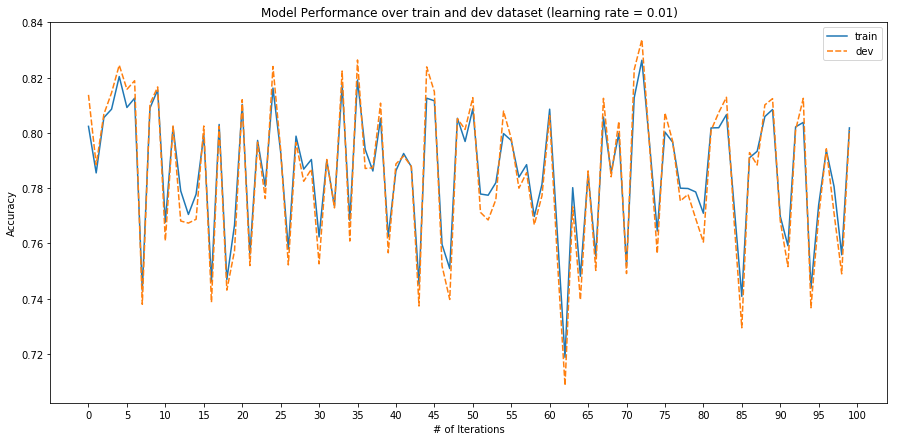

In [29]:
# Plot the model performance (learning rate = 0.01)
fig, ax = plt.subplots(figsize = (15,7))
sns.lineplot(data = [performance_df_001.loc[:,'train_accuracy'],
                     performance_df_001.loc[:,'dev_accuracy']])
ax.set_title('Model Performance over train and dev dataset (learning rate = 0.01)'); 
ax.set_xlabel('# of Iterations');
ax.set_ylabel('Accuracy');
ax.set_xticks(range(0,101,5));
ax.legend(['train','dev'])